In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Bio import SeqIO

In [2]:
# Import file: IBD_metadata.csv
metadata = pd.read_csv('data/ibdmbd_metadata.csv')
# replace all spaces in column names with underscores
metadata.columns = [c.replace(' ', '_') for c in metadata.columns]
metadata.head()


,Project,External_ID,Participant_ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research_Project,...,FecalCal_received_at_MGH:,Proteomics_received_at_LBNL:,Stool_Sample_ID:__Tube_A__(EtOH),Sample_ID:_Tube_B_(No_preservative),Tube_A_and_B_received_at_Broad:,stool_id,smoking_status,Number_years_smoked,Age_when_started_smoking,How_many_cigarettes/cigars/etc._do_you_smoke_per_day?
0,G79889,CSM5FZ3N_P,C3001,C3001C1,metagenomics,0,2014-03-14,0,4,ibdmdb,...,No,No,SM-5FZ3N,SM-5FZ3P,No,NaN,NaN,NaN,NaN,NaN
1,G79894,CSM5FZ3R_P,C3001,C3001C2,metagenomics,2,2014-03-28,14,5,ibdmdb,...,No,No,SM-5FZ3R,SM-5UJBB,Yes,NaN,NaN,NaN,NaN,NaN
2,G79903,CSM5YRY7_P,C3001,C3001C3,metagenomics,4,2014-04-15,18,6,ibdmdb,...,No,No,SM-5YRY7,SM-5YRY8,Yes,NaN,NaN,NaN,NaN,NaN
3,G79913,CSM5FZ3V_P,C3001,C3001C4,metagenomics,6,2014-04-28,13,7,ibdmdb,...,No,No,SM-5FZ3V,SM-5FZ3W,Yes,NaN,NaN,NaN,NaN,NaN
4,G79926,CSM5FZ4C_P,C3001,C3001C5,metagenomics,8,2014-05-09,11,8,ibdmdb,...,No,No,SM-5FZ4C,SM-5FZ4D,Yes,NaN,NaN,NaN,NaN,NaN


In [3]:
diagnoses = metadata[['External_ID', 'Participant_ID', 'week_num', 'interval_days', 'visit_num', 'diagnosis']]

print(diagnoses)


    External_ID Participant_ID  week_num  interval_days  visit_num diagnosis
0    CSM5FZ3N_P          C3001         0              0          4        CD
1    CSM5FZ3R_P          C3001         2             14          5        CD
2    CSM5YRY7_P          C3001         4             18          6        CD
3    CSM5FZ3V_P          C3001         6             13          7        CD
4    CSM5FZ4C_P          C3001         8             11          8        CD
..          ...            ...       ...            ...        ...       ...
779    PSMA266O          P6037        10             15          8        CD
780    PSMA266Q          P6037        12             13          9        CD
781    PSMA269G          P6037        16             14         12        CD
782    PSMA269O          P6037        24             14         16        CD
783    PSMB4MBS          P6037        33             13         21        CD

[784 rows x 6 columns]


In [4]:
# Purpose: To merge metadata with IBD search results
df = pd.read_csv('data/unprocessed_output.csv')

# Make new column External ID from id removing first character
df = df.assign(External_ID = df['id'].str[1:].str.split('_contig').str[0])

# remove * from 'seq'
df['seq'] = df['seq'].str.replace('*', '')
df

/tmp/ipykernel_3821485/2507543535.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['seq'] = df['seq'].str.replace('*', '')


,id,bitscore,evalue,seqID,location,sample,dna_length,protein_length,start,stop,...,blastn_target_seqid,blastn_target_name,blastn_target_accession,blastn_evalue,blastn_bitscore,blastn_pident,blastn_length,blastn_mismatch,blastn_gapopen,External_ID
0,{MSM6J2MJ_contigs_aminoAcid.faa}_k105_5911_ORF...,81.3,4.600000e-18,{MSM6J2MJ_contigs_aminoAcid.faa}_k105_5911_ORF...,[0-363](-),k105_5911,357,119,*,TAA,...,gi|1632869915|gb|CP039714.1|,"Salmonella enterica subsp. enterica serovar 1,...",CP039714,0.000000e+00,645.0,99.722,360.0,1.0,0.0,MSM6J2MJ
1,{CSM79HJI_P_contigs_aminoAcid.faa}_CSM79HJI_P....,81.2,4.700000e-18,{CSM79HJI_P_contigs_aminoAcid.faa}_CSM79HJI_P....,[171-533](-),CSM79HJI_P.c0000065228,360,120,ATG,TAA,...,gi|1632869915|gb|CP039714.1|,"Salmonella enterica subsp. enterica serovar 1,...",CP039714,0.000000e+00,655.0,100.000,363.0,0.0,0.0,CSM79HJI_P
2,{MSM5LLF2_P_contigs_aminoAcid.faa}_MSM5LLF2_P....,81.2,4.700000e-18,{MSM5LLF2_P_contigs_aminoAcid.faa}_MSM5LLF2_P....,[1545-1907](-),MSM5LLF2_P.c0000121289,360,120,ATG,TAA,...,gi|1632869915|gb|CP039714.1|,"Salmonella enterica subsp. enterica serovar 1,...",CP039714,0.000000e+00,651.0,99.725,363.0,1.0,0.0,MSM5LLF2_P
3,{MSM5LLF4_contigs_aminoAcid.faa}_k105_3301_ORF...,81.2,4.700000e-18,{MSM5LLF4_contigs_aminoAcid.faa}_k105_3301_ORF...,[4988-5350](+),k105_3301,360,120,ATG,TAA,...,gi|1632869915|gb|CP039714.1|,"Salmonella enterica subsp. enterica serovar 1,...",CP039714,0.000000e+00,651.0,99.725,363.0,1.0,0.0,MSM5LLF4
4,{MSM5LLF6_contigs_aminoAcid.faa}_k105_4907_ORF...,81.2,4.700000e-18,{MSM5LLF6_contigs_aminoAcid.faa}_k105_4907_ORF...,[4988-5350](+),k105_4907,360,120,ATG,TAA,...,gi|1632869915|gb|CP039714.1|,"Salmonella enterica subsp. enterica serovar 1,...",CP039714,0.000000e+00,651.0,99.725,363.0,1.0,0.0,MSM5LLF6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,{MSM5LLDC_contigs_aminoAcid.faa}_k105_10163_OR...,13.2,8.100000e+03,{MSM5LLDC_contigs_aminoAcid.faa}_k105_10163_OR...,[0-72](+),k105_10163,66,22,*,TGA,...,gi|291529795|emb|FP929044.1|,Eubacterium siraeum 70/3 draft genome,FP929044,1.020000e-06,62.6,83.051,59.0,10.0,0.0,MSM5LLDC
1037,{HSM5MD6I_P_contigs_aminoAcid.faa}_HSM5MD6I_P....,13.2,8.100000e+03,{HSM5MD6I_P_contigs_aminoAcid.faa}_HSM5MD6I_P....,[0-180](-),HSM5MD6I_P.c0000024289,450,150,*,TAA,...,gi|2188860891|dbj|AP025576.1|,"Lachnospiraceae bacterium CE91-St56 DNA, compl...",AP025576,7.180000e-34,156.0,73.260,273.0,67.0,3.0,HSM5MD6I_P
1038,{HSMA33KE_contigs_aminoAcid.faa}_k105_73992_OR...,13.1,8.500000e+03,{HSMA33KE_contigs_aminoAcid.faa}_k105_73992_OR...,[0-93](-),k105_73992,174,58,*,TAA,...,gi|1002677935|gb|KU516322.1|,Uncultured bacterium gwf2_scaffold_12 CRISPR-C...,KU516322,2.600000e-02,50.0,85.714,42.0,6.0,0.0,HSMA33KE
1039,{CSM67UEA_contigs_aminoAcid.faa}_k105_49248_OR...,13.1,8.700000e+03,{CSM67UEA_contigs_aminoAcid.faa}_k105_49248_OR...,[0-167](-),k105_49248,159,53,*,TAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CSM67UEA


In [5]:
temp_df = df[['blastn_target_name', 'seq']]
temp_df.replace(np.nan, 'No hits found', inplace=True)
# replace space with underscore
temp_df = temp_df.replace(' ', '_', regex=True)
temp_df

/tmp/ipykernel_3821485/348419275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.replace(np.nan, 'No hits found', inplace=True)


,blastn_target_name,seq
0,"Salmonella_enterica_subsp._enterica_serovar_1,...",AGIRELTLDEITLVSGGNANSNFEGGPRNERSSGARNSLGRNAPTH...
1,"Salmonella_enterica_subsp._enterica_serovar_1,...",MAGIRELTLDEITLVSGGNANSNFEGGPRNERSSGARNSLGRNAPT...
2,"Salmonella_enterica_subsp._enterica_serovar_1,...",MAGIRELTLDEITLVSGGNANSNFEGGPRNERSSGARNSLGRNAPT...
3,"Salmonella_enterica_subsp._enterica_serovar_1,...",MAGIRELTLDEITLVSGGNANSNFEGGPRNERSSGARNSLGRNAPT...
4,"Salmonella_enterica_subsp._enterica_serovar_1,...",MAGIRELTLDEITLVSGGNANSNFEGGPRNERSSGARNSLGRNAPT...
...,...,...
1036,Eubacterium_siraeum_70/3_draft_genome,LNIRIRKITENEIQKVIGGNRL
1037,"Lachnospiraceae_bacterium_CE91-St56_DNA,_compl...",MFDASDAVDYVREITGDDVNIIFGAMYDSNQADYCRITVIYGNPAV...
1038,Uncultured_bacterium_gwf2_scaffold_12_CRISPR-C...,MEDEITKRELSDDELDNVSGPDTLSNSSSESSLFVISSSIKNIPPSKIN
1039,No_hits_found,ILISLSKTELQNINGGEVPRAYYMDQDVINQNWDNLCTLGGLICGF...


In [6]:
# if directory does not exist, create it
import os
if not os.path.exists('tmp'):
    os.makedirs('tmp')

# write temp_df to fasta file
temp_df.to_csv('tmp/temp_df.csv', index=False, header=False, sep='\t')

# read in temp_df as fasta file
record_iterator = SeqIO.parse('tmp/temp_df.csv', 'tab')

with open('tmp/temp_df.fasta', 'w') as output_handle:
    for record in record_iterator:
        # write record to fasta file
        output_handle.write('>' + record.id + '\n')
        output_handle.write(str(record.seq) + '\n')



In [7]:
# run MMSeqs2 on ibd_newhits.fasta cluster at 50% identity
import subprocess

def run_mmseqs2(input_file, output_file):
    # Define the mmseqs2 command
    mmseqs2_command = f"mmseqs easy-cluster {input_file} {output_file} tmp --min-seq-id 0.5 --remove-tmp-files 1 --sort-results 1"
#    mmseqs2_command = f"mmseqs easy-linclust {input_file} {output_file} tmp --min-seq-id 0.5 --remove-tmp-files 1 --sort-results 1"

    # Execute the mmseqs2 command using subprocess
    subprocess.run(mmseqs2_command, shell=True, check=True)

# Example usage
input_file = "tmp/temp_df.fasta"
output_file = "tmp/ibd_newhits.clustering.RERUN"

# set seed for mmseqs
np.random.seed(42)

run_mmseqs2(input_file, output_file)


createdb tmp/temp_df.fasta tmp/10493255724087121262/input --max-seq-len 65535 --dont-split-seq-by-len 1 --dbtype 0 --dont-shuffle 1 --id-offset 0 --compressed 0 -v 3 

Converting sequences
[
Time for merging files: 0h 0m 0s 87ms
Time for merging files: 0h 0m 0s 84ms
Time for merging files: 0h 0m 0s 1ms
Time for processing: 0h 0m 0s 391ms
kmermatcher tmp/10493255724087121262/input tmp/10493255724087121262/clu_tmp/3138978843530223036/linclust/11411930252225789771/pref --sub-mat blosum62.out --alph-size 13 --min-seq-id 0.5 --kmer-per-seq 21 --adjust-kmer-len 0 --mask 0 --mask-lower-case 0 --cov-mode 0 -k 0 -c 0.8 --max-seq-len 65535 --hash-shift 5 --split-memory-limit 0 --include-only-extendable 0 --skip-n-repeat-kmer 0 --threads 112 --compressed 0 -v 3 

Database size: 1041 type: Aminoacid
Reduced amino acid alphabet: (A S T) (C) (D B N) (E Q Z) (F Y) (G) (H) (I V) (K R) (L J M) (P) (W) (X) 

Estimated memory consumption 0 MB
Generate k-mers list for 1 split
[============================

In [8]:
# read fasta file using seqIO
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd

# read fasta file
clusters = list(SeqIO.parse('tmp/ibd_newhits.clustering.RERUN_rep_seq.fasta', 'fasta'))
len(clusters)



90

In [9]:
# create a df with columns id and seq
clusters_df = pd.DataFrame(columns=['id', 'seq'])

for id, seq in enumerate(clusters):
    # rewrite above without append
    clusters_df.loc[id] = [seq.description, str(seq.seq)]

clusters_df

clusters_df.to_csv('tmp/ibd_newhits.clusters.RERUN_df.csv', index=False)

In [10]:
#merge clusters_df with df on seq
merged_df = pd.merge(clusters_df, df, on='seq', how='inner')

# remove duplicates
merged_df.drop_duplicates(subset='seq', inplace=True)

merged_df.reset_index(drop=True, inplace=True)

merged_df

# save merged_df to csv
merged_df.to_csv('tmp/clusters_with_data.csv', index=False)

In [11]:
df = pd.merge(df, diagnoses, on='External_ID', how='left')
df


,id,bitscore,evalue,seqID,location,sample,dna_length,protein_length,start,stop,...,blastn_pident,blastn_length,blastn_mismatch,blastn_gapopen,External_ID,Participant_ID,week_num,interval_days,visit_num,diagnosis
0,{MSM6J2MJ_contigs_aminoAcid.faa}_k105_5911_ORF...,81.3,4.600000e-18,{MSM6J2MJ_contigs_aminoAcid.faa}_k105_5911_ORF...,[0-363](-),k105_5911,357,119,*,TAA,...,99.722,360.0,1.0,0.0,MSM6J2MJ,M2034,33.0,14.0,23.0,CD
1,{CSM79HJI_P_contigs_aminoAcid.faa}_CSM79HJI_P....,81.2,4.700000e-18,{CSM79HJI_P_contigs_aminoAcid.faa}_CSM79HJI_P....,[171-533](-),CSM79HJI_P.c0000065228,360,120,ATG,TAA,...,100.000,363.0,0.0,0.0,CSM79HJI_P,C3030,0.0,0.0,4.0,CD
2,{MSM5LLF2_P_contigs_aminoAcid.faa}_MSM5LLF2_P....,81.2,4.700000e-18,{MSM5LLF2_P_contigs_aminoAcid.faa}_MSM5LLF2_P....,[1545-1907](-),MSM5LLF2_P.c0000121289,360,120,ATG,TAA,...,99.725,363.0,1.0,0.0,MSM5LLF2_P,M2034,5.0,14.0,7.0,CD
3,{MSM5LLF4_contigs_aminoAcid.faa}_k105_3301_ORF...,81.2,4.700000e-18,{MSM5LLF4_contigs_aminoAcid.faa}_k105_3301_ORF...,[4988-5350](+),k105_3301,360,120,ATG,TAA,...,99.725,363.0,1.0,0.0,MSM5LLF4,M2034,7.0,15.0,8.0,CD
4,{MSM5LLF6_contigs_aminoAcid.faa}_k105_4907_ORF...,81.2,4.700000e-18,{MSM5LLF6_contigs_aminoAcid.faa}_k105_4907_ORF...,[4988-5350](+),k105_4907,360,120,ATG,TAA,...,99.725,363.0,1.0,0.0,MSM5LLF6,M2034,10.0,19.0,9.0,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,{MSM5LLDC_contigs_aminoAcid.faa}_k105_10163_OR...,13.2,8.100000e+03,{MSM5LLDC_contigs_aminoAcid.faa}_k105_10163_OR...,[0-72](+),k105_10163,66,22,*,TGA,...,83.051,59.0,10.0,0.0,MSM5LLDC,M2008,34.0,21.0,22.0,CD
1037,{HSM5MD6I_P_contigs_aminoAcid.faa}_HSM5MD6I_P....,13.2,8.100000e+03,{HSM5MD6I_P_contigs_aminoAcid.faa}_HSM5MD6I_P....,[0-180](-),HSM5MD6I_P.c0000024289,450,150,*,TAA,...,73.260,273.0,67.0,3.0,HSM5MD6I_P,NaN,NaN,NaN,NaN,NaN
1038,{HSMA33KE_contigs_aminoAcid.faa}_k105_73992_OR...,13.1,8.500000e+03,{HSMA33KE_contigs_aminoAcid.faa}_k105_73992_OR...,[0-93](-),k105_73992,174,58,*,TAA,...,85.714,42.0,6.0,0.0,HSMA33KE,NaN,NaN,NaN,NaN,NaN
1039,{CSM67UEA_contigs_aminoAcid.faa}_k105_49248_OR...,13.1,8.700000e+03,{CSM67UEA_contigs_aminoAcid.faa}_k105_49248_OR...,[0-167](-),k105_49248,159,53,*,TAA,...,NaN,NaN,NaN,NaN,CSM67UEA,C3005,27.0,14.0,20.0,UC


In [12]:
# use regex to replace '>.*\n>' with '>Cluster_[number]\n>'
import re

# open file
file = open('tmp/ibd_newhits.clustering.RERUN_all_seqs.fasta', 'r')

# read file
filedata = file.read()

# replace '>.*\n>' with '>Cluster_[number]\n>'
filedata = re.sub('>.*\n>', '\nCluster_[number]\n>', filedata)

# replace [number] with ascending numbers
for i in range(1, 100):
    filedata = filedata.replace('[number]', str(i), 1)

# write file
with open('tmp/ibd_newhits.clusters.fasta', 'w') as file:
    file.write(filedata)


In [13]:
# open file
file = open('tmp/ibd_newhits.clusters.fasta', 'r')

# read file
filedata = file.read()

# split filedata at empty lines into separate files
filedata = filedata.split('\n\n')

# for each cluster, read as fasta file and concat to a single dataframe
cluster_df = pd.DataFrame(columns=['id', 'seq'])
for cluster in filedata:
    cluster = cluster.split('\n')
    # remove empty items from list
    cluster = list(filter(None, cluster))
    # print(cluster)
    # print((len(cluster)-1)/2)
    cluster_number = cluster[0]
    for i in range(1, len(cluster)-1):
        # if i is even, it is a header
        if i % 2 != 0:
            new_row = pd.DataFrame({'id': [cluster[i]], 'seq': [cluster[i+1]], 'Cluster_#': [cluster_number]})
            cluster_df = pd.concat([cluster_df, new_row], ignore_index=True)
            # cluster_df = cluster_df.append({'id': cluster[i], 'seq': cluster[i+1], 'description': cluster_number}, ignore_index=True)
    
    
cluster_df


,id,seq,Cluster_#
0,>Escherichia_coli_strain_ATCC_25922_chromosome...,MRKLSENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAGAY...,Cluster_1
1,>Escherichia_coli_strain_LBV045/18_pyometra_ch...,MFYFIFRENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAG...,Cluster_1
2,>Escherichia_coli_strain_ATCC_25922_chromosome...,MRKLSENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAGAY...,Cluster_1
3,>Escherichia_coli_strain_LBV045/18_pyometra_ch...,MRKLSENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAGAY...,Cluster_1
4,>Escherichia_coli_strain_ATCC_25922_chromosome...,MRKLSENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAGAY...,Cluster_1
...,...,...,...
1036,>Pseudomonas_aeruginosa_strain_2017-45-169_chr...,MKKSQRSYQVRELSIIEMDIVSGGNSLDAAATGAGGRKI,Cluster_87
1037,>Escherichia_coli_O10:H32_strain_NMBU-W12E19_c...,MRNITTDELALIHGAGLDKDASVAIGTAAGGFLGKATKIPGADIAG...,Cluster_88
1038,>Escherichia_coli_O10:H32_strain_NMBU-W12E19_c...,MRNITTDELALIHGAGLDKDASVAIGTAAGGFLGKATKIPGADIAG...,Cluster_88
1039,>MAG:_Bacilli_bacterium_isolate_nC33_bin.244.f...,MKELNINEMKSIEGGTGLTSSMLNIKFITNNNIIIIDNKKYYYQIR...,Cluster_89


In [14]:
# remove duplicates from cluster_df
cluster_df.drop_duplicates(subset='seq', inplace=True)
cluster_df

,id,seq,Cluster_#
0,>Escherichia_coli_strain_ATCC_25922_chromosome...,MRKLSENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAGAY...,Cluster_1
1,>Escherichia_coli_strain_LBV045/18_pyometra_ch...,MFYFIFRENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAG...,Cluster_1
7,>Escherichia_coli_strain_NCCP_14540_chromosome...,MRKLSENEIKQISGGDGNDGQVELISIGSLAGTFISPGFGSIAGAY...,Cluster_1
9,>Escherichia_coli_strain_CFSAN061771_chromosom...,MRKLSENEIKQISGGDGNDGQAELIAIGSLAGTFISPGFGSIAGAY...,Cluster_1
10,>Klebsiella_pneumoniae_strain_D16KP0109_chromo...,MKELTINEMESIAGAYSWDFSSFSSALTSILSNSAEAVASALLLGS...,Cluster_2
...,...,...,...
1035,>Klebsiella_aerogenes_strain_NCTC9652_genome_a...,MSSIRTLTFEEITKVSGGEGHGSEWARDKRDAAMNASLNGAGAGYG...,Cluster_86
1036,>Pseudomonas_aeruginosa_strain_2017-45-169_chr...,MKKSQRSYQVRELSIIEMDIVSGGNSLDAAATGAGGRKI,Cluster_87
1037,>Escherichia_coli_O10:H32_strain_NMBU-W12E19_c...,MRNITTDELALIHGAGLDKDASVAIGTAAGGFLGKATKIPGADIAG...,Cluster_88
1039,>MAG:_Bacilli_bacterium_isolate_nC33_bin.244.f...,MKELNINEMKSIEGGTGLTSSMLNIKFITNNNIIIIDNKKYYYQIR...,Cluster_89


In [15]:
df = pd.merge(df, cluster_df[['seq', 'Cluster_#']], on='seq', how='left')
df


,id,bitscore,evalue,seqID,location,sample,dna_length,protein_length,start,stop,...,blastn_length,blastn_mismatch,blastn_gapopen,External_ID,Participant_ID,week_num,interval_days,visit_num,diagnosis,Cluster_#
0,{MSM6J2MJ_contigs_aminoAcid.faa}_k105_5911_ORF...,81.3,4.600000e-18,{MSM6J2MJ_contigs_aminoAcid.faa}_k105_5911_ORF...,[0-363](-),k105_5911,357,119,*,TAA,...,360.0,1.0,0.0,MSM6J2MJ,M2034,33.0,14.0,23.0,CD,Cluster_14
1,{CSM79HJI_P_contigs_aminoAcid.faa}_CSM79HJI_P....,81.2,4.700000e-18,{CSM79HJI_P_contigs_aminoAcid.faa}_CSM79HJI_P....,[171-533](-),CSM79HJI_P.c0000065228,360,120,ATG,TAA,...,363.0,0.0,0.0,CSM79HJI_P,C3030,0.0,0.0,4.0,CD,Cluster_14
2,{MSM5LLF2_P_contigs_aminoAcid.faa}_MSM5LLF2_P....,81.2,4.700000e-18,{MSM5LLF2_P_contigs_aminoAcid.faa}_MSM5LLF2_P....,[1545-1907](-),MSM5LLF2_P.c0000121289,360,120,ATG,TAA,...,363.0,1.0,0.0,MSM5LLF2_P,M2034,5.0,14.0,7.0,CD,Cluster_14
3,{MSM5LLF4_contigs_aminoAcid.faa}_k105_3301_ORF...,81.2,4.700000e-18,{MSM5LLF4_contigs_aminoAcid.faa}_k105_3301_ORF...,[4988-5350](+),k105_3301,360,120,ATG,TAA,...,363.0,1.0,0.0,MSM5LLF4,M2034,7.0,15.0,8.0,CD,Cluster_14
4,{MSM5LLF6_contigs_aminoAcid.faa}_k105_4907_ORF...,81.2,4.700000e-18,{MSM5LLF6_contigs_aminoAcid.faa}_k105_4907_ORF...,[4988-5350](+),k105_4907,360,120,ATG,TAA,...,363.0,1.0,0.0,MSM5LLF6,M2034,10.0,19.0,9.0,CD,Cluster_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,{MSM5LLDC_contigs_aminoAcid.faa}_k105_10163_OR...,13.2,8.100000e+03,{MSM5LLDC_contigs_aminoAcid.faa}_k105_10163_OR...,[0-72](+),k105_10163,66,22,*,TGA,...,59.0,10.0,0.0,MSM5LLDC,M2008,34.0,21.0,22.0,CD,Cluster_41
1037,{HSM5MD6I_P_contigs_aminoAcid.faa}_HSM5MD6I_P....,13.2,8.100000e+03,{HSM5MD6I_P_contigs_aminoAcid.faa}_HSM5MD6I_P....,[0-180](-),HSM5MD6I_P.c0000024289,450,150,*,TAA,...,273.0,67.0,3.0,HSM5MD6I_P,NaN,NaN,NaN,NaN,NaN,Cluster_44
1038,{HSMA33KE_contigs_aminoAcid.faa}_k105_73992_OR...,13.1,8.500000e+03,{HSMA33KE_contigs_aminoAcid.faa}_k105_73992_OR...,[0-93](-),k105_73992,174,58,*,TAA,...,42.0,6.0,0.0,HSMA33KE,NaN,NaN,NaN,NaN,NaN,Cluster_66
1039,{CSM67UEA_contigs_aminoAcid.faa}_k105_49248_OR...,13.1,8.700000e+03,{CSM67UEA_contigs_aminoAcid.faa}_k105_49248_OR...,[0-167](-),k105_49248,159,53,*,TAA,...,NaN,NaN,NaN,CSM67UEA,C3005,27.0,14.0,20.0,UC,Cluster_50


In [16]:
# remove 'Cluster_' from Cluster_# column and convert to int
df['Cluster_#'] = df['Cluster_#'].str.replace('Cluster_', '', regex=False).astype(int)

df.to_csv('data/ibdmbd_results_cluster_analysis.csv', index=False)

In [17]:
# Show blastn_target_name for Cluster_#
for i in range(1, 91):
    print(i)
    print(df[df['Cluster_#'] == i]['blastn_target_name'].value_counts())
    print('')


1
Escherichia coli strain ATCC 25922 chromosome, complete genome            6
Escherichia coli strain LBV045/18_pyometra chromosome, complete genome    2
Escherichia coli strain NCCP 14540 chromosome, complete genome            1
Escherichia coli strain CFSAN061771 chromosome, complete genome           1
Name: blastn_target_name, dtype: int64

2
Klebsiella pneumoniae strain D16KP0109 chromosome, complete genome    13
Name: blastn_target_name, dtype: int64

3
Klebsiella pneumoniae strain NMBU-W07E18 chromosome, complete genome                6
Klebsiella pneumoniae strain KP20194a chromosome, complete genome                   4
Klebsiella pneumoniae strain E16KP0102 chromosome, complete genome                  4
Klebsiella variicola strain AHKv-S01 chromosome, complete genome                    2
Klebsiella quasipneumoniae strain CAV2013 chromosome, complete genome               2
Klebsiella pneumoniae strain WCHKP13F2 chromosome, complete genome                  2
Klebsiella quasipneum

In [18]:
# add empty column for Gram Stain
df['Gram_Stain'] = ''

# create dictionary of species and their gram stain
gram_stain_dict = {'Escherichia coli': 'Gram Negative', 
                    'Salmonella enterica': 'Gram Negative', 
                    'Citrobacter freundii': 'Gram Negative', 
                    'Klebsiella pneumoniae': 'Gram Negative', 
                    'Enterobacter asburiae': 'Gram Negative', 
                    'Klebsiella oxytoca': 'Gram Negative', 
                    'Streptococcus thermophilus': 'Gram Positive', 
                    'Enterococcus faecium': 'Gram Positive', 
                    'Lactobacillus intestinalis': 'Gram Positive', 
                    'Morganella morganii': 'Gram Negative', 
                    'Klebsiella variicola': 'Gram Negative', 
                    'Pseudomonas aeruginosa': 'Gram Negative', 
                    'Phocaeicola vulgatus': 'Gram Negative', 
                    'Enterococcus durans': 'Gram Positive', 
                    'Lactobacillus amylovorus': 'Gram Positive', 
                    'Chryseobacterium': 'Gram Negative', 
                    'Clostridium felsineum': 'Gram Positive', 
                    'Ktedonobacteria bacterium': 'Gram Positive', 
                    'Klebsiella': 'Gram Negative', 
                    'Brevibacillus agri': 'Gram Positive', 
                    'Erythrobacter aureus': 'Gram Negative', 
                    'Paracidovorax citrulli': 'Gram Negative', 
                    'Planktothrix pseudagardhii': 'Gram Negative', 
                    'Mucilaginibacter sp.': 'Gram Negative', 
                    'Bacilli bacterium': 'Gram Positive', 
                    'Clostridium novyi': 'Gram Positive',
                    'Thermoanaerobacterium thermosaccharolyticum': 'Gram Positive',
                    'Phocaeicola dorei': 'Gram Negative',
                    'Bacteroides cellulosilyticus': 'Gram Negative',
                    'Oscillospiraceae bacterium': 'Gram Positive',
                    'Virgibacillus': 'Gram Positive',
                    'Liquorilactobacillus hordei': 'Gram Positive',
                    'Butyricimonas faecalis': 'Gram Negative',
                    'Uncultured bacterium': 'Unknown',
                    'MAG: Bacilli bacterium': 'Gram Positive',
                    'Streptomyces cyanogenus': 'Gram Positive',
                    'MAG: Oscillospiraceae bacterium': 'Gram Positive',
                    'Rhizobium leguminosarum': 'Gram Negative',
                    'Bacteroides eggerthii': 'Gram Negative',
                    'Phascolarctobacterium faecium': 'Gram Negative',
                    'Azospira restricta': 'Gram Negative',
                    'Serratia fonticola': 'Gram Negative',
                    'Nostoc sp. UHCC 0702': 'Gram Negative',
                    'Christiangramia salexigens': 'Gram Negative',
                    'Pseudomonas sp. KBS0707': 'Gram Negative',
                    'Eubacterium siraeum': 'Gram Positive',
                    'Lachnospiraceae bacterium': 'Gram Positive',
                    'Streptomyces sp. S465': 'Gram Positive'
                    }

# use map with a lambda function to set Gram Stain based on blastn_target_name
df['Gram_Stain'] = df['blastn_target_name'].map(lambda x: next((value for key, value in gram_stain_dict.items() if isinstance(x, str) and x.startswith(key)), None))

# If there are entries that didn't match, you can fill those with a default value
default_gram_stain = 'Unknown'  # You can change this to any default value
df['Gram_Stain'].fillna(default_gram_stain, inplace=True)


df['Gram_Stain'].value_counts()


Gram Negative    968
Gram Positive     43
Unknown           30
Name: Gram_Stain, dtype: int64

In [19]:
# make a dictionary with cluster number as key and gram stain as value
gram_stain_dict = df[['Cluster_#', 'Gram_Stain']].set_index('Cluster_#').to_dict()['Gram_Stain']
gram_stain_dict

{14: 'Gram Negative',
 80: 'Gram Negative',
 26: 'Gram Negative',
 88: 'Gram Negative',
 1: 'Gram Negative',
 55: 'Gram Negative',
 71: 'Gram Negative',
 65: 'Gram Negative',
 67: 'Gram Negative',
 75: 'Gram Negative',
 78: 'Gram Negative',
 84: 'Gram Positive',
 2: 'Gram Negative',
 37: 'Gram Positive',
 42: 'Gram Negative',
 45: 'Gram Positive',
 3: 'Gram Negative',
 64: 'Gram Negative',
 72: 'Gram Positive',
 83: 'Gram Negative',
 85: 'Gram Negative',
 61: 'Gram Positive',
 68: 'Gram Negative',
 4: 'Gram Negative',
 73: 'Gram Negative',
 76: 'Gram Negative',
 79: 'Gram Positive',
 81: 'Gram Negative',
 86: 'Gram Negative',
 7: 'Gram Negative',
 46: 'Gram Negative',
 18: 'Gram Negative',
 22: 'Gram Negative',
 74: 'Gram Negative',
 59: 'Gram Negative',
 62: 'Gram Negative',
 5: 'Gram Negative',
 69: 'Gram Negative',
 66: 'Unknown',
 51: 'Gram Negative',
 56: 'Gram Negative',
 6: 'Unknown',
 47: 'Gram Negative',
 16: 'Gram Negative',
 31: 'Gram Negative',
 63: 'Gram Negative',
 40: 'G

In [20]:
# Drop rows with duplicate 'seq' values
df_knowns = df.drop_duplicates(subset='seq', inplace=False)
len(df_knowns)


174

/tmp/ipykernel_3821485/1504671892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knowns['percent_coverage'] = ((df_knowns['qend']-df_knowns['qstart']+1)/df_knowns['protein_length'])*df_knowns['pid']


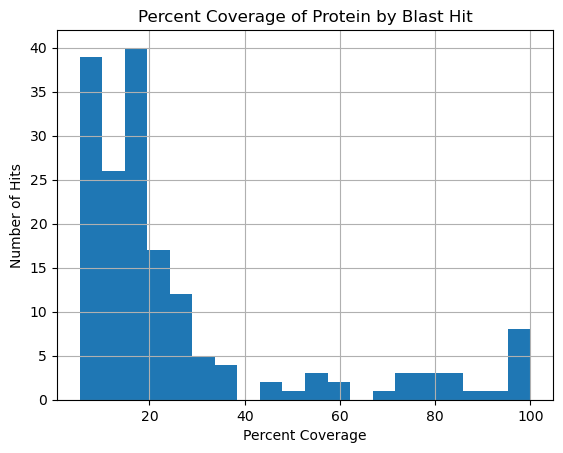

In [21]:
# find percentage of the protein that is covered by the blast hit
df_knowns['percent_coverage'] = ((df_knowns['qend']-df_knowns['qstart']+1)/df_knowns['protein_length'])*df_knowns['pid']
df_knowns['percent_coverage']

# plot histogram of percent coverage
df_knowns['percent_coverage'].hist(bins=20)
plt.xlabel('Percent Coverage')
plt.ylabel('Number of Hits')
plt.title('Percent Coverage of Protein by Blast Hit')
plt.show()

In [51]:
matching_at_50_percent = df_knowns[df_knowns['percent_coverage']>=50][['Cluster_#', 'subject']]
matching_at_50_percent = matching_at_50_percent.append(df_knowns[df_knowns['subject'] == 'BAC024'][['Cluster_#', 'subject']])

# split subject column at _ and take first item
matching_at_50_percent['subject'] = 'Microcin ' + matching_at_50_percent['subject'].str.split('_').str[0] + ' ' + matching_at_50_percent['Cluster_#'].astype(str)
# convert cluster_# to int
matching_at_50_percent['Cluster_#'] = matching_at_50_percent['Cluster_#'].astype(int)

# change subject where subject contains 'BAC' to 'Enterocin B'
matching_at_50_percent.loc[matching_at_50_percent['subject'].str.contains('BAC101'), 'subject'] = 'Enterocin B'
matching_at_50_percent.loc[matching_at_50_percent['subject'].str.contains('BAC024'), 'subject'] = 'Acidocin J1132'


matching_at_50_percent

# df_knowns[df_knowns['percent_coverage']>80]['subject']


/tmp/ipykernel_3821485/3801272815.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Cluster_#,subject
0,14,Microcin PDI 14
1,14,Microcin PDI 14
19,14,Microcin PDI 14
20,80,Microcin V 80
22,80,Microcin V 80
27,80,Microcin V 80
28,26,Microcin H47 26
29,88,Microcin EN33 88
31,1,Microcin M 1
38,26,Microcin H47 26


In [52]:
# save df_knowns to csv
df_knowns.to_csv('data/known_microcins.csv', index=False)

In [54]:
x_values = df['Cluster_#'].value_counts().index.tolist()

# make x_numbers a copy of x_values
x_numbers = x_values.copy()

y_values = df['Cluster_#'].value_counts().values

for i in range(0, len(x_values)):
        if x_values[i] in matching_at_50_percent['Cluster_#'].values:
                x_values[i] = matching_at_50_percent[matching_at_50_percent['Cluster_#'] == x_values[i]]['subject'].values[0]

# if x is an int set x labels to be the cluster number 

for i in range(0, len(x_values)):
        if isinstance(x_values[i], int):
                x_values[i] = 'Cluster ' + str(x_values[i])

# x_numbers
# x_values

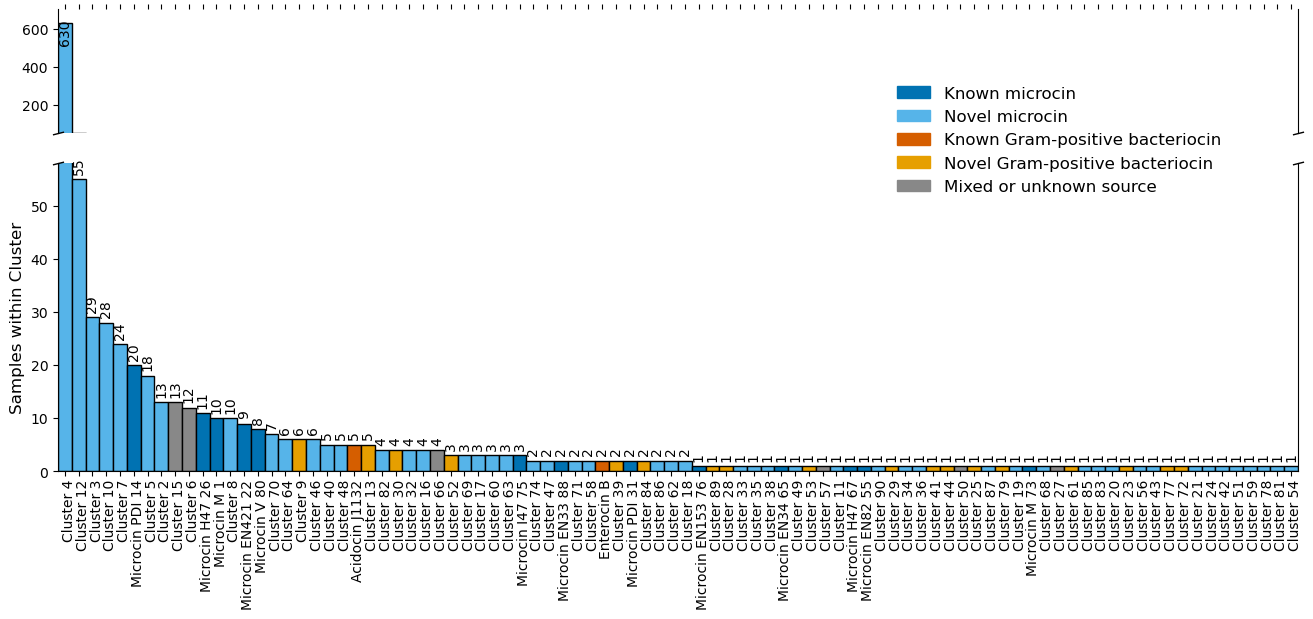

In [55]:
import matplotlib.patches as mpatches

# plot histogram of Cluster_# by diagnosis
plt.rcParams["figure.figsize"] = (16,8)

fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.000001)

# make df of x and y
df2 = pd.DataFrame({'x': x_values, 'y': y_values, 'x_numbers': x_numbers})
df2['Gram_stain'] = df2['x_numbers'].map(gram_stain_dict)

# add color column based on Gram_stain

df2.loc[df2['Gram_stain'] == 'Unknown', 'color'] = '#888888' # grey
df2.loc[df2['Gram_stain'] == 'NA', 'color'] = '#888888' # grey
df2.loc[df2['Gram_stain'] == 'Both', 'color'] = '#888888' # grey
df2.loc[df2['Gram_stain'] == 'Gram Positive', 'color'] = '#E69F00' # light orange
df2.loc[df2['Gram_stain'] == 'Gram Negative', 'color'] = '#56B4E9'  #light blue

known_mic = mpatches.Patch(color='#0072B2', label='Knowns')
novel_mic = mpatches.Patch(color='#56B4E9', label='Gram Negative')
known_bac = mpatches.Patch(color='#D55E00', label='Knowns')
novel_bac = mpatches.Patch(color='#E69F00', label='Gram Positive')
unk = mpatches.Patch(color='#888888', label='Unk')

# if new_x doesn't start with Microcin or Cluster make color dark orange
df2.loc[df2['x'].str.startswith('Cluster') == False, 'color'] = '#D55E00' # dark orange

# if new_x starts with Microcin, make color dark blue
df2.loc[df2['x'].str.startswith('Microcin'), 'color'] = '#0072B2' # dark blue

# rotate x labels
plt.xticks(rotation=90, ha='right', rotation_mode='default')

# plot bar 1
ax1.bar(df2['x'],
        df2['y'],
        width=1,
        alpha=1,
        color = df2['color'],
        edgecolor='black')

# plot bar 2
ax2.bar(df2['x'],
        df2['y'],
        width=1,
        alpha=1,
        color = df2['color'],
        edgecolor='black')

# add legend
ax1.legend([known_mic, novel_mic, known_bac, novel_bac, unk],
        ['Known microcin', 'Novel microcin', 'Known Gram-positive bacteriocin', 'Novel Gram-positive bacteriocin', 'Mixed or unknown source'],
        # add colors to legend
        loc='upper right', 
        fontsize=12, 
        frameon=False, 
        bbox_to_anchor=(0.95, 1.3))

# remove white space on graph
plt.margins(0)

# break y axis
ax1.set_ylim(0, 58)
ax2.set_ylim(58, 700)

# reduce height of ax2
box = ax2.get_position()

ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                    box.width, box.height * 0.4])

# hide the spines between ax and ax2
ax2.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.xaxis.tick_top()

d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)

# make x labels smaller
plt.xticks(fontsize=10)

# make y axis label
plt.ylabel('Samples within Cluster', fontsize=12)

# shift x ticks right
ax1.tick_params(axis='x', which='major', pad=2)

import matplotlib.transforms

dx = 10/90.; dy = 0/90.
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# add numbers over bars
for i, v in enumerate(df2['y']):
        if i > 0:
                ax1.text(i, v + 1.5, str(v), color='black', rotation=90, ha='center', fontsize=10)

for i, v in enumerate(df2['y']):
        if i == 0:
                ax2.text(i, v - 100, str(v), color='black', rotation=90, ha='center', fontsize=10)


for label in ax1.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

# repeat above for ax2
for label in ax2.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

# save figure
plt.savefig('plots/IBDMDB_cluster_barplot.svg')

In [56]:
# import dysbiosis_scores.tsv
dysbiosis_scores = pd.read_csv('data/dysbiosis_scores.tsv', sep='\t', index_col=False, header=None)

#rename columns External_ID, Dysbiosis_Score, Dysbiosis_Score_2
dysbiosis_scores.columns = ['External_ID', 'Dysbiosis_Score', 'Dysbiosis_Score_2']

dysbiosis_scores


,External_ID,Dysbiosis_Score,Dysbiosis_Score_2
0,CSM5FZ4M,0.761300,False
1,CSM5MCUO,0.632952,False
2,CSM5MCVL,0.912606,True
3,CSM5MCVN,0.916895,True
4,CSM5MCW6,0.962751,True
...,...,...,...
1590,CSM6J2H9_P,0.615147,False
1591,HSM5MD4A_P,0.792428,False
1592,CSM5MCUW_P,0.759109,False
1593,ESM5MEBA_P,0.774633,False


In [57]:
# merge dysbiosis_scores with df on External_ID
df_dysbio = df.merge(dysbiosis_scores, on='External_ID', how='left')
df_dysbio.columns


Index(['id', 'bitscore', 'evalue', 'seqID', 'location', 'sample', 'dna_length',
       'protein_length', 'start', 'stop', 'pephash', 'dnahash', 'dna', 'seq',
       'subject', 'pid', 'length', 'mismatch', 'gapopen', 'qstart', 'qend',
       'sstart', 'send', 'evalue_blastp', 'bitscore_blastp',
       'evalue_signal_sequence', 'hit_start_signal_sequence',
       'query_start_signal_sequence', 'evalue_gram_positive',
       'hit_start_gram_positive', 'query_start_gram_positive',
       'evalue_microcin_domain', 'hit_start_microcin_domain',
       'query_start_microcin_domain', 'blastn_target_seqid',
       'blastn_target_name', 'blastn_target_accession', 'blastn_evalue',
       'blastn_bitscore', 'blastn_pident', 'blastn_length', 'blastn_mismatch',
       'blastn_gapopen', 'External_ID', 'Participant_ID', 'week_num',
       'interval_days', 'visit_num', 'diagnosis', 'Cluster_#', 'Gram_Stain',
       'Dysbiosis_Score', 'Dysbiosis_Score_2'],
      dtype='object')

In [58]:
# count NA in Dysbiosis_Score
df_dysbio
print(len(df_dysbio))

# remove rows with NA in Dysbiosis_Score
df_dysbio = df_dysbio.dropna(subset=['Dysbiosis_Score'])
print(len(df_dysbio))

# to csv
df_dysbio.to_csv('tmp/df_dysbio.csv', index=False)

1041
1038


In [59]:
# select only clusters with more than 3 samples
list_of_clusters = df_dysbio['Cluster_#'].value_counts()[df_dysbio['Cluster_#'].value_counts() > 4].index.tolist()
list_of_clusters

[4,
 12,
 3,
 10,
 7,
 14,
 5,
 15,
 2,
 6,
 26,
 8,
 1,
 22,
 80,
 70,
 9,
 46,
 64,
 48,
 45,
 40,
 13]

In [60]:
# select only clusters with more than 3 samples
df_dysbio = df_dysbio[df_dysbio['Cluster_#'].isin(list_of_clusters)]

# make x values Cluster_#
x_values = df_dysbio['Cluster_#'].value_counts().index.tolist()
x_values.sort()

# make x_numbers a copy of x_values
x_numbers = x_values.copy()

y_values = df['Cluster_#'].value_counts().values

for i in range(0, len(x_values)):
        if x_values[i] in matching_at_50_percent['Cluster_#'].values:
                x_values[i] = matching_at_50_percent[matching_at_50_percent['Cluster_#'] == x_values[i]]['subject'].values[0]

# if x is an int set x labels to be the cluster number 

for i in range(0, len(x_values)):
        if isinstance(x_values[i], int):
                x_values[i] = 'Cluster ' + str(x_values[i])

# make x values strings
# x_values = ['Cluster ' + str(x) for x in x_values]
# x_values = ['Microcin PDI' if x == 'Cluster 1' else str(x) for x in x_values]
# x_values = ['Microcin_V' if x == 'Cluster 2' else str(x) for x in x_values]
# x_values = ['Microcin EN33' if x == 'Cluster 3' else str(x) for x in x_values]
# x_values = ['Microcin M' if x == 'Cluster 4' else str(x) for x in x_values]
# x_values = ['Microcin EN82' if x == 'Cluster 5' else str(x) for x in x_values]
# x_values = ['Microcin EN91-like' if x == 'Cluster 6' else str(x) for x in x_values]
# x_values = ['Microcin EN34' if x == 'Cluster 7' else str(x) for x in x_values]
# x_values = ['Microcin L-like' if x == 'Cluster 8' else str(x) for x in x_values]
# x_values = ['Microcin EN123-like' if x == 'Cluster 9' else str(x) for x in x_values]
# x_values = ['Microcin I47' if x == 'Cluster 10' else str(x) for x in x_values]
# x_values = ['Enterocin B' if x == 'Cluster 11' else str(x) for x in x_values]
# x_values = ['Acidocin J1132-ext' if x == 'Cluster 12' else str(x) for x in x_values]
# x_values = ['Thermophilin A' if x== 'Cluster 13' else str(x) for x in x_values]
# x_values = ['Microcin EN91-like2' if x == 'Cluster 20' else str(x) for x in x_values]

# make y values Dysbiosis_Score
y_values = df_dysbio.groupby('Cluster_#')['Dysbiosis_Score_2'].mean().values

y_values = y_values*100

colors = df_dysbio.groupby('Cluster_#')['Gram_Stain'].first().values
colors = np.where(colors == 'NA', '#888888', colors)
colors = np.where(colors == 'Both', '#888888', colors)
colors = np.where(colors == 'Unknown', '#888888', colors)
colors = np.where(colors == 'Gram Positive', '#E69F00', colors)
colors = np.where(colors == 'Gram Negative', '#56B4E9', colors)

#make df of x and y
df_dysbio_plot = pd.DataFrame({'x': x_values, 'y': y_values, 'Gram_Stain': colors})

# sort df by y
df_dysbio_plot = df_dysbio_plot.sort_values(by=['y'], ascending=True)
df_dysbio_plot.loc[df_dysbio_plot['x'].str.startswith('Cluster') == False, 'Gram_Stain'] = '#D55E00'
df_dysbio_plot.loc[df_dysbio_plot['x'].str.startswith('Microcin') == True, 'Gram_Stain'] = '#0072B2'


In [61]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_dysbio_plot['y'],
    y=df_dysbio_plot['x'],
    marker=dict(color=df_dysbio_plot['Gram_Stain'], size=12),
    mode="markers",
    name="markers"))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title='',
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='black',
        tickfont_color='black',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='black',
        title='Percentage of samples dysbiotic',
        titlefont_size=18,
        titlefont_family='Arial',
        titlefont_color='black',
    ),
    margin=dict(
        l=120,
        r=120,
        b=10,
        t=50,
    ),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='#F1F1F1',
    hovermode='closest',
)

# remove padding
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# shift y labels left
fig.update_yaxes(tickfont=dict(family='Arial', color='black', size=16))

# remove padding on x axis
fig.update_xaxes(tickfont=dict(family='Arial', color='black', size=16))


fig.show()

fig.to_image(format='svg', engine='kaleido')
# make directory 'figures' if it doesn't exist
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

fig.write_image("plots/dysbiosis_scores.svg")